**Análisis del Dataset Enron-Spam mediante Técnicas de Machine Learning**

En este apartado se presenta el análisis del dataset Enron-Spam, el cual contiene correos electrónicos clasificados como spam y ham (no spam). Dicho conjunto de datos se encuentra disponible en la siguiente dirección: Khttps://www.kaggle.com/datasets/marcelwiechmann/enron-spam-data
.

**Fase I.-** En esta primera fase se realiza la importación de las librerías para el análisis, así como una exploración inicial del dataset Enron-Spam. El objetivo es conocer la estructura de los datos y preparar el entorno de trabajo para aplicar las técnicas de Machine Learning en fases posteriores.

In [1]:
import os # Librería para interactuar con el sistema de archivos (rutas, carpetas, etc.)
import pandas as pd # Librería para manejo y análisis de datos en tablas (estructuras tipo DataFrame)
from sklearn.feature_extraction.text import TfidfVectorizer #Librerias para analizar texto
from sklearn.model_selection import train_test_split # Función de scikit-learn para dividir los datos en conjuntos de entrenamiento y prueba
import matplotlib.pyplot as plt # Librería para crear gráficos y visualizaciones
import kagglehub # Librería para descargar datasets directamente desde Kaggle en Google Colab



**Fase 2.-** Descargar el Dataset

In [ ]:
# Descargar la ultima version de los datos
path = kagglehub.dataset_download("marcelwiechmann/enron-spam-data")

#Leer el CSV (tras descomprimir si es necesario)
csv_path = os.path.join(path, "enron_spam_data.csv")  # o .zip si prefieres leer sin descomprimir
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
else:
#Si todavía está en ZIP, puedes usar:
    df = pd.read_csv(path, compression='zip')

print(df.head()) # Checar los primeros 5 datos

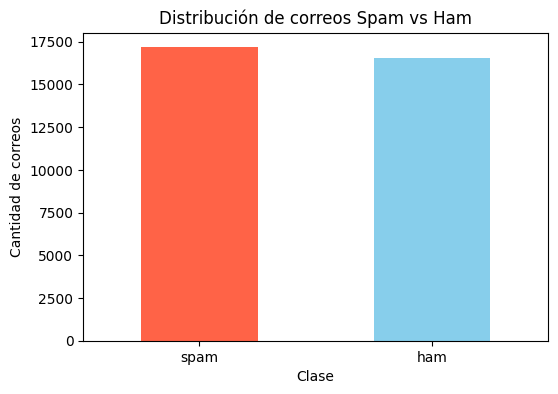

In [6]:
class_counts = df["Spam/Ham"].value_counts()  # Ver distribución de clases,
# Existen 17,171 correos de spam y 16,545 de no espam

# Gráfico de barras de los correos
plt.figure(figsize=(6,4))
class_counts.plot(kind="bar", color=["tomato", "skyblue"])  # Colores diferentes para cada clase
plt.title("Distribución de correos Spam vs Ham")
plt.xlabel("Clase")
plt.ylabel("Cantidad de correos")
plt.xticks(rotation=0)  # Mantener etiquetas horizontales
plt.show()

**Fase 3**.- Limpieza del texto o preprocesamiento del texto es necesario para eliminar elementos irrelevantes que pueden afectar el rendimiento del modelo

In [ ]:
# =============================
# 2. Limpiar texto (recomendable)
# =============================

import re  # Librería de expresiones regulares (para buscar y reemplazar patrones en el texto)

# Función para limpiar el texto de los correos
def clean_text(text):
    # Si el valor es NaN (faltante), devolver un string vacío
    if pd.isna(text):
        return ""
    # Convertir todo el texto a minúsculas
    text = text.lower()
    # Eliminar URLs (ej. http://example.com)
    text = re.sub(r"http\S+", " ", text)
    # Eliminar números
    text = re.sub(r"\d+", " ", text)
    # Eliminar signos de puntuación y caracteres especiales (solo dejar letras y espacios)
    text = re.sub(r"[^\w\s]", " ", text)
    return text  # Devolver el texto limpio

# Crear nueva columna "text" uniendo el Subject y Message (si hay NaN se reemplaza con "")
# Luego se aplica la función de limpieza definida arriba
df["text"] = (df["Subject"].fillna("") + " " + df["Message"].fillna("")).apply(clean_text)

# Normalizar etiquetas: convertir columna "Spam/Ham" a minúsculas y guardarla como "label"
df["label"] = df["Spam/Ham"].str.lower()


# =============================
# 3. Vectorización con TF-IDF
# =============================

# Inicializar el vectorizador TF-IDF
# - stop_words="english": elimina palabras vacías comunes en inglés (ej. "the", "and", "is")
# - max_features=5000: se limita a las 5000 palabras más relevantes
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)

# Transformar el texto en una matriz numérica (X = características, y = etiquetas)
X = vectorizer.fit_transform(df["text"])  # Matriz TF-IDF del texto
y = df["label"]  # Variable objetivo (spam o ham)
